In [1]:
# configures the notebook to show plots inside it
%matplotlib inline

# Chapter 2
# Descriptive Statistics: What do we Know about the Data?
---

## Setting Up
Here, we set up the variables we need from previous chapter's notebook in order to contiinue using them in this chapter. We just need the `data_of_interest` variable to be available.

In [2]:
import pandas as pd

data = pd.read_csv("../datasets/PimaIndiansDiabetes.csv")
data_of_interest = data.loc[:, ["Blood Glucose", "BMI", "Class"]]

---
## 2.2 Descriptive Statistics

### 2.2.1 Mean, Mode, and Median

Here we start exploring the _measures of central tendancy_ for our data of interest, starting with the **mean**

In [3]:
mean_values = data_of_interest.mean()
print(mean_values)

Blood Glucose    120.894531
BMI               31.992578
Class              0.348958
dtype: float64


---
For the discrete values of `Class`, the mean value doesn't seem very interpretable rightnow. The **mode** helps with such cases 

In [4]:
mode_values = data_of_interest.mode()
print(mode_values)

   Blood Glucose   BMI  Class
0             99  32.0    0.0
1            100   NaN    NaN


---
The last measure of central tendancy we can use is the median, which is simpy the center value of the samples that splits it into two halves. If we think about the data clustering around its center (the definition of central _tendancy_), then the median is a very good candidate to capture that _center_.

In [5]:
median_values = data_of_interest.median()
print(median_values)

Blood Glucose    117.0
BMI               32.0
Class              0.0
dtype: float64


---
### 2.2.2 Ranges, Sample Variance, and Sample Standard Deviation

To start looking at how the data are dispersed, it's a good idea to look at the minimum and maximum values of the data. Along with the mesaures of central tendancy, the min and max values give us an overview of the range on which the values are dispersed

In [6]:
min_values = data_of_interest.min()
max_values = data_of_interest.max()

print(min_values)
print("=========")
print(max_values)

Blood Glucose    0.0
BMI              0.0
Class            0.0
dtype: float64
Blood Glucose    199.0
BMI               67.1
Class              1.0
dtype: float64


---
The results above show something strange about the data; we see that the BMI and BG has values of 0, which is biologically impossible. This is an example of **_missing data_** that could skew our work in the wrong direction. Our solution here is to drop these instances by selecting only the records that has nonzero values for the BMI and BG

In [7]:
bmi_zeros_mask = data_of_interest.loc[:, "BMI"] != 0
bg_zeros_mask = data_of_interest.loc[:, "Blood Glucose"] != 0

clean_data_of_interest = data_of_interest[bmi_zeros_mask & bg_zeros_mask]

---
We can check the validity of the cleaning process by running the `min()` and `max()` methods again, but this time against the clean version of the data.

In [8]:
min_values = clean_data_of_interest.min()
max_values = clean_data_of_interest.max()

print(min_values)
print("=========")
print(max_values)

Blood Glucose    44.0
BMI              18.2
Class             0.0
dtype: float64
Blood Glucose    199.0
BMI               67.1
Class              1.0
dtype: float64


---
In addition to min and max values, **_quantiles_** give us a more detailed picture about the distribution of the data, a picture that we can visualize using **_boxplots_**

      Blood Glucose   BMI  Class
0.25          99.75  27.5    0.0
0.50         117.00  32.3    0.0
0.75         141.00  36.6    1.0


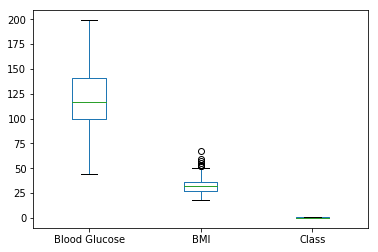

In [9]:
quartiles = clean_data_of_interest.quantile([0.25, 0.5, 0.75])

print(quartiles)
clean_data_of_interest.plot.box()

---
While boxplots allow us to understand the distribution better, we're still missing some information (like how the values inside the box are distributed). **_Variance_** and **_standard deviation_** give us single numeric measurments of how that data are spraed around the central tendancy; they tell us, on average, how far the data lies from the mean value

In [10]:
sample_vars = clean_data_of_interest.var()
sample_stds = clean_data_of_interest.std()

print(sample_vars)
print("==========")
print(sample_stds)

Blood Glucose    936.433323
BMI               48.010018
Class              0.228121
dtype: float64
Blood Glucose    30.601198
BMI               6.928926
Class             0.477621
dtype: float64


---
### 2.2.3 Histogram Plots
Histogram plots are the clearest depction for the distribution of the data. By grouping values into bins and allowing the hieght of the bin to represent how frequent these values are, we get a nice of visual of the how the data in the sample is distributed 

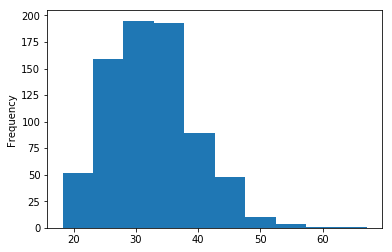

In [11]:
clean_data_of_interest.loc[:, "BMI"].plot.hist()

---
While histograms depict the _sample distribution_, they also give us a way to leap out of the sample and start approximating the distribution of the original population. This done by converting the plots to a plots of _**density**_ and not **_frequency_**

Text(0,0.5,'Density')

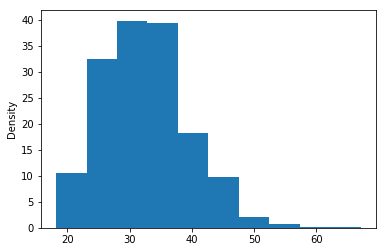

In [12]:
bin_size = 4.89 # the bin size in the 10 bins histogram

data_size = len(clean_data_of_interest.loc[:, "BMI"])
weights_seq = [1 / bin_size] * data_size


clean_data_of_interest.loc[:, "BMI"].plot.hist(weights=weights_seq) \
.set_ylabel("Density") # changes the label on y-axis

---
<h4 style='color:darkred'>Exercise 2.1 </h4>

<span style='color:darkred'>Generate the histogram plot for the Blood Glucose values.</span>

In [13]:
# Your solution goes here

---
<h4 style='color:darkred'>Exercise 2.2 </h4>
<span style='color:darkred'>Is the data sample we're using biased, or unbiased? Think about how you can determine that using the tools you learned in this chapter.</span>

In [14]:
# Your solution goes here